In [ ]:
import os
import numpy as np

import torch

from model.AnomalyTransformer import AnomalyTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
model = AnomalyTransformer(win_size=100, enc_in=26, c_out=26, e_layers=3)
model.load_state_dict(torch.load("/home/joono/Anomaly-Transformer/checkpoints/SmartFarm_checkpoint.pth"))
model = model.eval()

model = model.to("cuda")

temperature = 50

In [ ]:
def preprocess_data(smartfarm_data_path="/home/joono/Anomaly-Transformer/dataset/SmartFarm/smartfarm_train.npz"):
    scaler = StandardScaler()
    data = np.load(smartfarm_data_path)['arr_0']
    scaler.fit(data)
    data = scaler.transform(data)
    
    return data

In [ ]:
data = preprocess_data()

In [ ]:
data.shape

In [ ]:
input = torch.tensor(np.float32(data[:100])).to('cuda')

In [ ]:
input.shape

In [ ]:
output = model(input.unsqueeze(0))

In [ ]:
enc_out, _, _, _ = output
enc_out = enc_out.squeeze()

In [ ]:
print(enc_out.shape)

In [ ]:
enc_out[1], data[0]

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("results.csv")

In [ ]:
refined_facility_data = []
for facility_id in data['facilityId'].unique():
    
    facility_data = data[data["facilityId"] == facility_id]
    if len(facility_data) > 1000:
        refined_facility_data.append(facility_data)

In [ ]:
refined_df = pd.concat(refined_facility_data)

In [ ]:
refined_df

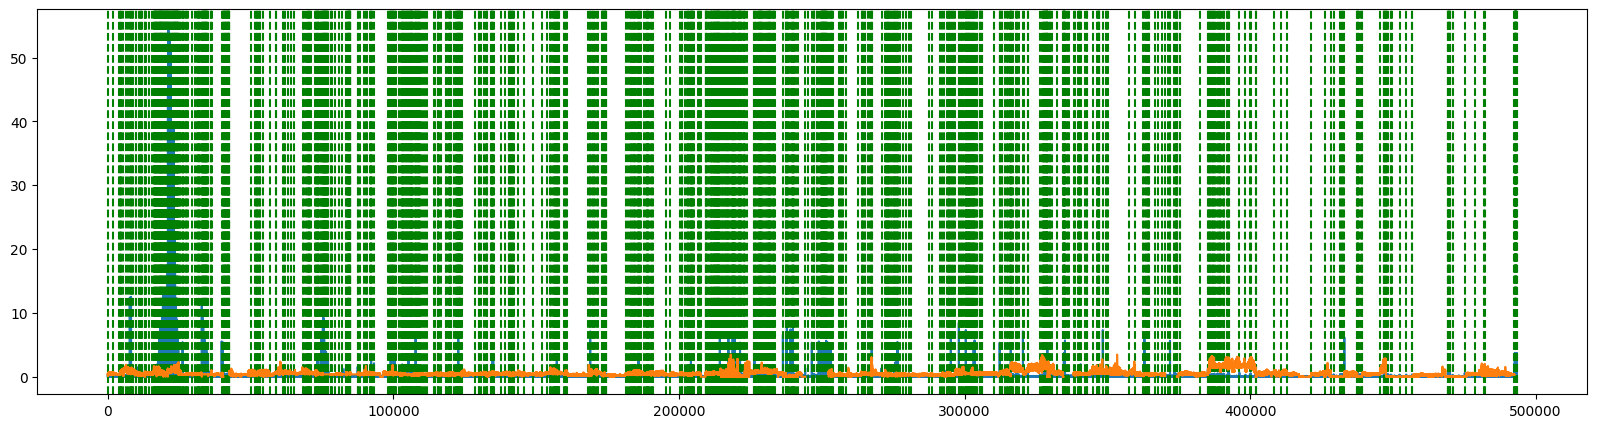

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm

start, end = 10170, 10300

pred = np.load("pred.npy")
test_energy = np.load("test_energy.npy")
origin_data = pd.read_csv("/home/joono/AnomalyEnvDetector/dataset/SmartFarm/SmartFarm_tomato_env_sensor_data.csv")

plt.figure(figsize=(20, 5))
plt.plot(test_energy[start:end])

# pos = 0
# for facid in origin_data["facilityId"].unique():
#     facid_data = origin_data[origin_data["facilityId"] == facid]
#     if len(facid_data) > 1000:
#         pos += len(facid_data)
#         plt.axvline(x=pos, color='r', linestyle="--")

for pr in np.where(pred == 1)[0]:
    if start < pr < end:
        plt.axvline(x=pr-start, color='g', linestyle="--")
    
plt.plot(origin_data["CI"][start:end].to_numpy() / 1000)